# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = mars_soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
columns = []
data = []
# Loop through the scraped data to create a list of rows
headings = table.find_all('th')
for heading in headings:
    columns.append(heading.get_text())

# Loop through the scraped data to create a list of rows
rows = table.find_all('tr', class_='data-row')

for row in rows:
    items = []
    row_data = row.find_all('td')
    for result in row_data:
        items.append(result.text)
    data.append(items)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns = columns)


In [8]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis

mars_weather_df[mars_weather_df.columns[1]] = pd.to_datetime(mars_weather_df[mars_weather_df.columns[1]])
mars_weather_df[mars_weather_df.columns[2]] = mars_weather_df[mars_weather_df.columns[2]].astype(int) 
mars_weather_df[mars_weather_df.columns[3]] = mars_weather_df[mars_weather_df.columns[3]].astype(int)
mars_weather_df[mars_weather_df.columns[4]] = mars_weather_df[mars_weather_df.columns[4]].astype(int) 
mars_weather_df[mars_weather_df.columns[5]] = mars_weather_df[mars_weather_df.columns[5]].astype(float) 
mars_weather_df[mars_weather_df.columns[6]] = mars_weather_df[mars_weather_df.columns[6]].astype(float) 

In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_weather_df['month'].max()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
mars_weather_df['month'].count()

1867

In [16]:
# 3. What is the average low temperature by month?
mars_month_temp = mars_weather_df[['month','min_temp']].groupby(by='month').mean()

mars_month_temp['min_temp'] = mars_month_temp['min_temp'].round(decimals = 4)

mars_month_temp


,min_temp
month,
1,-77.1609
2,-79.9326
3,-83.3073
4,-82.7474
5,-79.3087
6,-75.2993
7,-72.2817
8,-68.3830
9,-69.1716


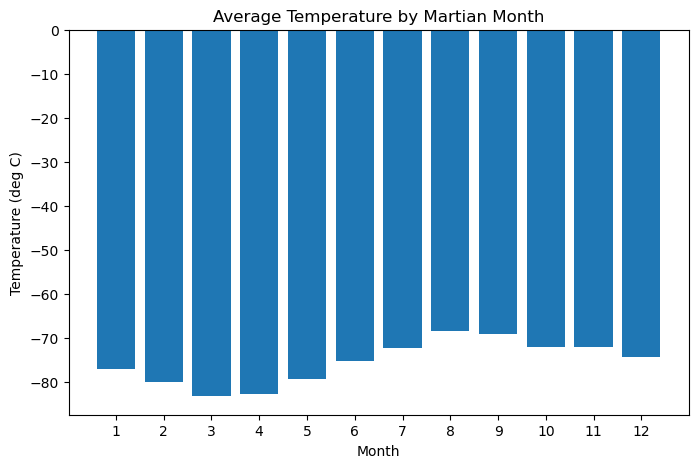

In [18]:

# Plot the average temperature by month
fig, ax = plt.subplots(figsize=[8,5])
ax = plt.bar(mars_month_temp.index,mars_month_temp.min_temp)
plt.xticks(ticks = range(1,13,1))
plt.xlabel('Month')
plt.ylabel('Temperature (deg C)')
plt.title('Average Temperature by Month')
plt.show()


The coldest month is 3 with a minimum temperature of -83.3073 deg C
The hottest month is 8 with a maximum temperature of -68.383 deg C


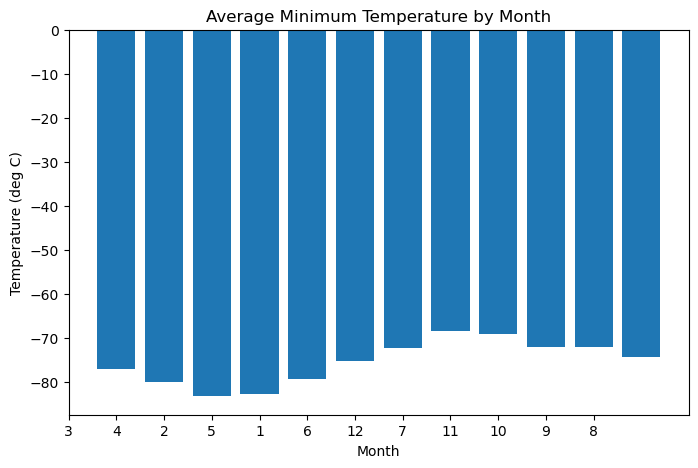

In [26]:
fig, ax = plt.subplots(figsize=[8,5])

# Sort the dataframe by min_temp in ascending order
mars_month_temp_sorted = mars_month_temp.sort_values(by='min_temp')

# Reset the index to get the months in ascending order
mars_month_temp_sorted.reset_index(inplace=True)

# Plot the minimum temperatures
ax = plt.bar(mars_month_temp_sorted['month'], mars_month_temp_sorted.min_temp)
plt.xticks(ticks = range(12), labels=mars_month_temp_sorted['month'])
plt.xlabel('Month')
plt.ylabel('Temperature (deg C)')
plt.title('Average Minimum Temperature by Month')

# Identify the coldest month
coldest_month = mars_month_temp_sorted['month'].iloc[0]
print(f'The coldest month is {coldest_month} with a minimum temperature of {mars_month_temp_sorted.min_temp.min()} deg C')

# Identify the hottest month
hottest_month = mars_month_temp_sorted['month'].iloc[-1]
print(f'The hottest month is {hottest_month} with a maximum temperature of {mars_month_temp_sorted.min_temp.max()} deg C')

plt.show()

In [20]:
# 4. What is the average pressure by month?
mars_month_pressure = mars_weather_df[['month','pressure']].groupby(by='month').mean()

mars_month_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


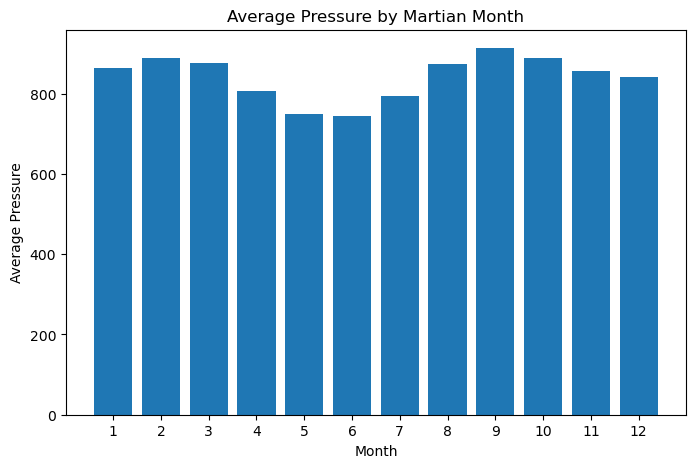

In [21]:
# Plot the average pressure by month
fig, ax = plt.subplots(figsize=[8,5])
ax = plt.bar(mars_month_pressure.index,mars_month_pressure.pressure)
plt.xticks(ticks = range(1,13,1))
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.show()


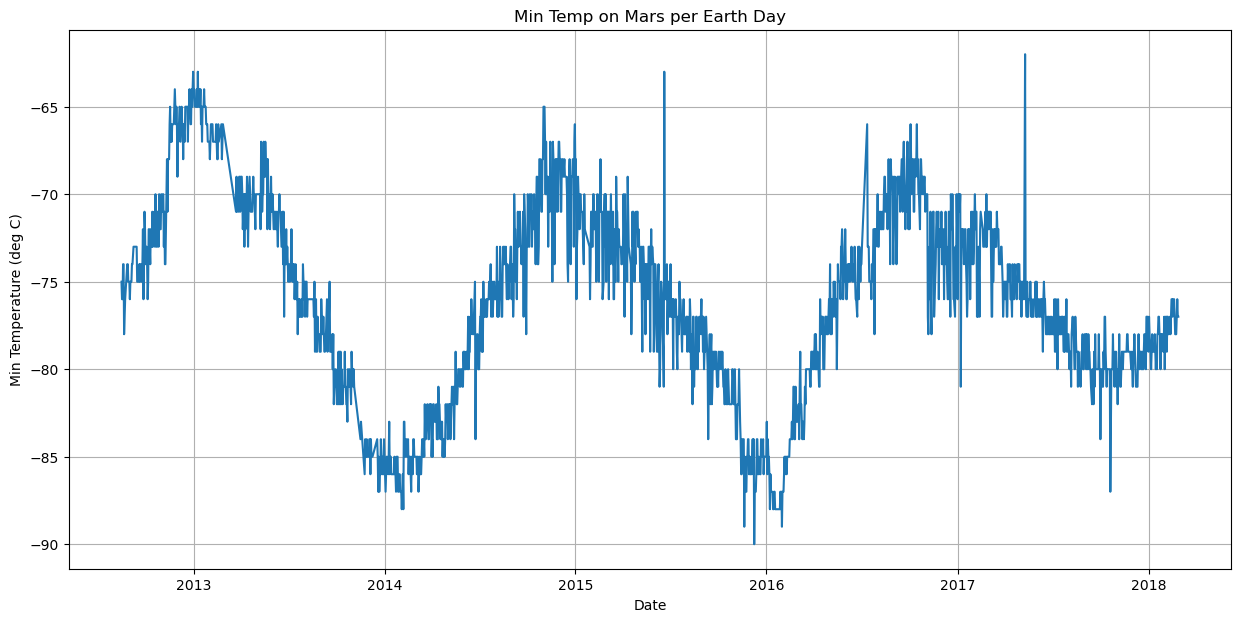

In [31]:
# 5. How many terrestrial (earth) days are there in a Martian year?
fig, ax = plt.subplots(figsize=[15,7])
ax = plt.plot(mars_weather_df.terrestrial_date,mars_weather_df.min_temp)
plt.grid(visible=True, which='both')
plt.xlabel('Date')
plt.ylabel('Min Temperature (deg C)')
plt.title('Min Temp on Mars per Earth Day')
plt.show()

#### Minimum Temperature

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms! These findings provide valuable insights into the Martian climate, highlighting the extreme temperatures that exist on the planet.


#### Atmospheric Pressure

Atmospheric pressure on Mars follows a distinct pattern, with the lowest pressure occurring in the sixth month and the highest pressure in the ninth. This fluctuation is crucial to understanding the planet's atmospheric dynamics and its impact on the Martian environment.

#### Year Length

The Martian atmospheric pressure cycle exhibits a remarkable periodicity, with the distance from peak to peak spanning approximately 675 days, which is remarkably close to the actual Mars year equivalent of 687 Earth days. This striking correlation underscores the intricate relationships between the planet's orbital patterns and its atmospheric phenomena.



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
# Write the data to a CSV
mars_weather_df.to_csv('marsweather.csv', index=False)

mars_month_temp.to_csv('marsmonthtemps.csv', index=False)

mars_month_pressure.to_csv('marspressuremonth.csv', index=False)

In [30]:
browser.quit()